Task 1: Import Necessary Modules


In [1]:
# Import necessary modules
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt

Task 2: Load and Preprocess Text Data


Run the following code to load data from the text file:

In [2]:
# Load the data
with open('/usercode/names.txt', 'r') as file:
    names = file.read().splitlines()

Run the following code to preprocess names by converting them to lowercase and adding start and end markers:

In [3]:
# Preprocessing names
names = ['<' + name.lower() + '>' for name in names]

Task 3: Build and Visualize the Bigram Lookup Table

Use the following code to initialize and sort vocabulary:

In [4]:
# Initialize and sort vocabulary
vocabulary = set(''.join(names))
vocabulary = ''.join(sorted(vocabulary))
lookup_table = torch.zeros((len(vocabulary), len(vocabulary)), dtype=torch.int32)

Use the following code to create an encoder:

In [5]:
# Create an encoder
char_to_int = {char: i for i, char in enumerate(vocabulary)}

Perform bigram transition counts calculation using the following code:

In [6]:
# Calculate bigram transition counts
for name in names:
    for i in range(len(name) - 1):
        ix1 = char_to_int[name[i]]
        ix2 = char_to_int[name[i+1]]
        lookup_table[ix1, ix2] += 1

Visualize the bigram counts using the following code:

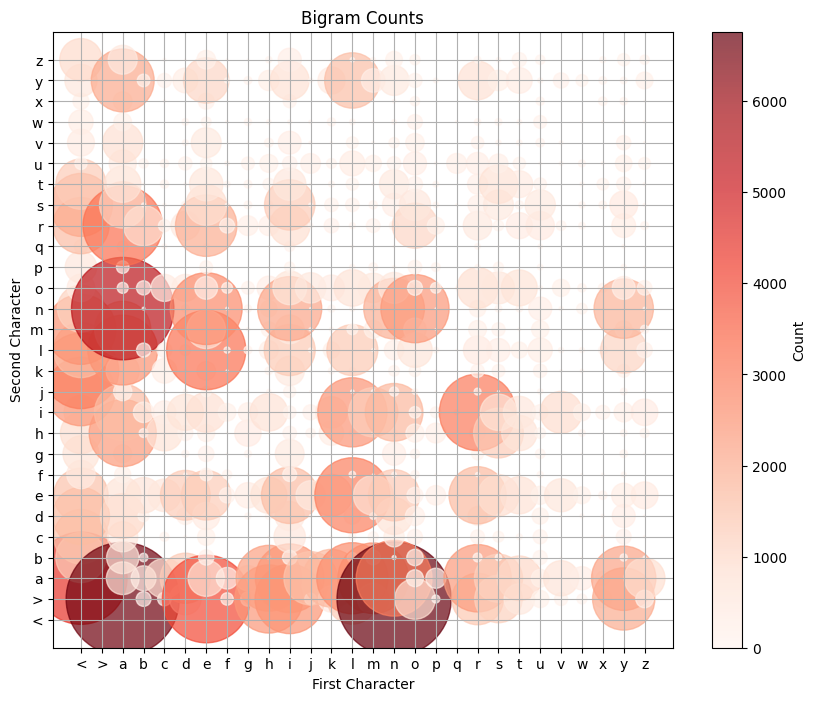

In [7]:
# Prepare x, y, and counts for the scatter plot
x = [i for i in range(len(lookup_table)) for _ in range(len(lookup_table[0]))]
y = [j for _ in range(len(lookup_table)) for j in range(len(lookup_table[0]))]
counts = [lookup_table[i][j] for i in range(len(lookup_table)) for j in range(len(lookup_table[0]))]

# Visualize the bigram counts
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x, y, s=counts, c=counts, cmap='Reds', alpha=0.7)
plt.xticks(ticks=np.arange(len(vocabulary)), labels=vocabulary)
plt.yticks(ticks=np.arange(len(vocabulary)), labels=vocabulary)
plt.xlabel('First Character')
plt.ylabel('Second Character')
plt.title('Bigram Counts')
plt.colorbar(scatter, label='Count')
plt.grid(True)
plt.show()

Task 4: Generate Names with Bigram Language Model


Execute the following code to complete this task:

In [8]:
# Generate names with Bigram Language Model
def generate_name(start_string=''):
    name = '<' + start_string.lower()
    while True:    
        ix1 = char_to_int[name[-1]]
        next_char_probs = lookup_table[ix1]
        total_weight = sum(next_char_probs)
        if total_weight > 0:
            next_char = random.choices(vocabulary, weights=next_char_probs, k=1)[0]
        else:
            next_char = random.choice(vocabulary)
        if next_char == '>':
            break
        name += next_char
    return name[1:].capitalize()

# Generate and print 10 unique names using the Bigram Language Model
unique_names = set()
while(len(unique_names) < 10):
    name = generate_name('Joe')    
    if '<' + name.lower() + '>' not in names:
        unique_names.add(name)

for name in unique_names:
    print(name)

Joeeyndomarevy
Joesthretes
Joelyahaviri
Joeyeh
Joennn
Joelecie
Joersun
Joena
Joecorinyny
Joehisn


Task 5: Generate Names Utilizing Trigrams

Update the lookup table for trigrams using the following code:

In [9]:
# Adjust the lookup table dimensions for trigrams
lookup_table_trigram = torch.zeros((len(vocabulary), len(vocabulary), len(vocabulary)), dtype=torch.int32)

# Compute trigram transition counts
for name in names:
    for i in range(len(name) - 2):
        ix1 = char_to_int[name[i]]  
        ix2 = char_to_int[name[i+1]]
        ix3 = char_to_int[name[i+2]]
        lookup_table_trigram[ix1, ix2, ix3] += 1

Run the following code to generate names using the Trigram Language Model

In [10]:
# Trigram Model Function
def generate_name_trigram(start_string=''):
    name = '<' + start_string
    while True:
        if len(name) < 2:
            next_char = random.choice(vocabulary)
        else:
            ix1 = char_to_int[name[-2]]
            ix2 = char_to_int[name[-1]]
            next_char_probs = lookup_table_trigram[ix1, ix2]
            total_weight = sum(next_char_probs)
            if total_weight > 0:
                next_char = random.choices(vocabulary, weights=next_char_probs, k=1)[0]
            else:
                next_char = random.choice(vocabulary)
        if next_char == '>':
            break
        name += next_char
    return name[1:].capitalize()

# Generate and print 10 unique names using the Trigram Language Model
unique_names = set()
while(len(unique_names) < 10):
    name = generate_name_trigram('Joe')    
    if '<' + name.lower() + '>' not in names:
        unique_names.add(name)

for name in unique_names:
    print(name)

Joeygrajavyn
Joeigh
Joelya
Joeline
Joeleyah
Joelley
Joelayles
Joelano
Joennexocia
Joetzen


Task 6: Define a Decoder and Convert Characters to Tensors

Execute the following code to complete this task:

In [11]:
# Decoder
int_to_char = {idx: char for idx, char in enumerate(vocabulary)}

#  Convert a string of characters to a tensor of integer indexes
def char_to_tensor(text):
  return torch.tensor([char_to_int[char] for char in text], dtype=torch.long)

Task 7: Design the RNN Architecture for Language Modeling

Execute the following code to complete this task:

In [12]:
# Custom RNN 
class CustomRNN(nn.Module):
    def __init__(self, input_size, embed_size, hidden_dim, output_size):
        super(CustomRNN, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=input_size, embedding_dim=embed_size)
        self.rnn = nn.GRU(input_size=embed_size, hidden_size=hidden_dim)
        self.fc = nn.Linear(hidden_dim, output_size)
        self.hidden_dim = hidden_dim

    def forward(self, x, hidden):
        x = self.embedding(x).view(1, 1, -1)
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out.view(1, -1))
        return out, hidden

Task 8: Write Functions to Generate Text

Execute the following code to complete this task:

In [13]:
MAX_NAME_LENGTH = 32

# Generate text with the model
def generate_name_rnn(model, start_string='', length=MAX_NAME_LENGTH, temperature=0.8):
    start_string = '<' + start_string.lower()
    input_string = char_to_tensor(start_string)
    hidden = torch.zeros(1, 1, model.hidden_dim)

    for i in range(len(start_string) - 1):
        _, hidden = model(input_string[i].unsqueeze(0), hidden)

    generated_text = start_string[1:]
    input_char = input_string[-1].unsqueeze(0)

    for _ in range(length):
        output, hidden = model(input_char.unsqueeze(0), hidden)
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        next_char = int_to_char[top_i.item()]
        if next_char == '>':
            break
        generated_text += next_char
        input_char = char_to_tensor(next_char)
    
    return generated_text.capitalize()

# Generate and print n unique names using the Bigram Language Model
def generate_unique_names(model, start_string, n):
    unique_names = set()
    while(len(unique_names) < n):
        name = generate_name_rnn(model, start_string, MAX_NAME_LENGTH)
        
        if '<' + name.lower() + '>' not in names:
            unique_names.add(name)

    for name in unique_names:
        print(name)

Task 9: Train the Custom RNN Model

Execute the following code to complete this task:

Epoch 1, Loss: 72873.5467
Joera
Joerana
Joeleny
Joeron
Joemae
Joer
Joerama
Joena
Joeah
Joelana
Epoch 2, Loss: 71939.7763
Joecer
Joerri
Joelamor
Joerry
Joepielyn
Joeti
Joenal
Joela
Joene
Joelynne
Epoch 3, Loss: 71909.2844
Joera
Joemy
Joerma
Joelioniye
Joerre
Joedod
Joerann
Joenlii
Joez
Joeella


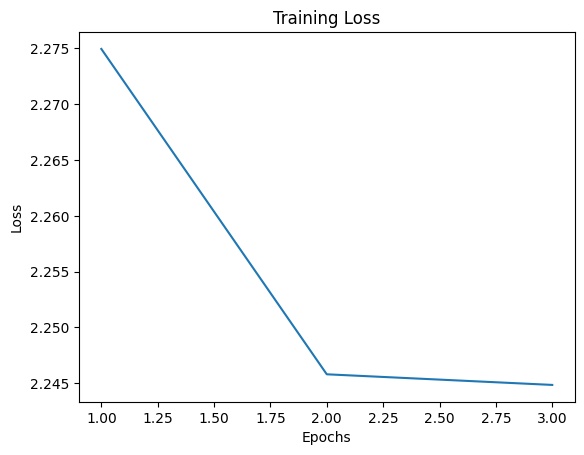

In [14]:
# Define the training parameters
EMBED_SIZE = 32
HIDDEN_DIM = 32
EPOCHS = 3

# Training setup
model = CustomRNN(len(vocabulary), EMBED_SIZE, HIDDEN_DIM, MAX_NAME_LENGTH)
optimizer = optim.Adam(model.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()

# Training loop
losses = []

for epoch in range(EPOCHS):
    total_loss = 0
    random.shuffle(names)  # Shuffle the dataset to ensure different order each epoch

    for name in names:
        inputs = char_to_tensor(name[:-1])
        targets = char_to_tensor(name[1:])
        
        hidden = torch.zeros(1, 1, HIDDEN_DIM)
        optimizer.zero_grad()
        loss = 0

        for i in range(len(inputs)):
            output, hidden = model(inputs[i].unsqueeze(0), hidden)
            loss += criterion(output, targets[i].unsqueeze(0))
        
        loss.backward()
        optimizer.step()
        total_loss += loss.item() / len(inputs)
    
    losses.append(total_loss / len(names))
    print(f'Epoch {epoch+1}, Loss: {total_loss:.4f}')
    generate_unique_names(model, 'Joe', 10)
    print('=' * 50)

# Plot the loss curve
plt.plot(range(1, EPOCHS + 1), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()